# Case Study 2: Modeling Runners' Times in the Cherry Blossom Race
## MSDS 7333: Quantifying the World
### Andy Nguyen, Michael Wolfe, Joseph Caguioa

---

# Intro

Road running has become a popular fitness activity across America and worldwide. From beginner-friendly opportunities like the Couch to 5K plan to highly advanced endurance trials like 100-mile ultramarathons, it is a sport open to all people, recreational to competitive and everything in-between, as long as they are willing to keep putting one foot in front of the other. 

Annual road running events are one way to observe how the changes in participating demographics evolve over time. One such example is the Cherry Blossom Ten Mile Run, an event originally founded in 1973 as a training run for Boston Marathon competitors that has evolved into an international attraction for all abilities due to its scenic route through Washington D.C.'s historic landmarks during the spring cherry blossom bloom. 

<br>
<figure class ="image">
<center>
    <img src = "http://www.rdatasciencecases.org/Runners/figures/CBWebPage.png" width=500>
    <figcaption id = "Figure 1"><a href = "http://cherryblossom.org">Figure 1: Cherry Blossom Homepage</a></figcaption>
</center>
</figure>

Reportedly there was a second road running boom in the late 1990s and early 2000s. Additionally, women have come to make up the majority of event participants. Scraping result data publicly available on race sites like the one aforementioned is one way to explore how the demographic trends for women runners may have evolved over time, if at all.

# Data Description

The Cherry Blossom Ten Mile Run's online results are in a form commonly used by road race timing companies, which generally report some combination of the following pieces of information for each participant at an event:

* Overall Place
* Place within Age Division
* Bib Number
* Name
* Age
* Hometown and State or Home Country
* Overall Finish Time
* Overall Pace
* Split Times & Paces

As shown in Figures 2 and 3, each row contains data for one runner's race results. However, the column names provided may vary year to year, and not all data points are always included. For example, the 2011 results make a distinction between gun and chip finish times (as "Gun Tim" and "Net Tim"), while the 2012 results only include the latter (simply as "Time"). Such disparities introduce complications when attempting to scrape this data; one common function will not easily work across all years.

<br>
<figure class ="image">
<center>
    <img src = "http://www.rdatasciencecases.org/Runners/figures/Men2011ResultsSS.png" width=500>
    <figcaption id = "Figure 2">Figure 2: 2011 Male Results</figcaption>
</center>
</figure>

<figure class ="image">
<center>
    <img src = "http://www.rdatasciencecases.org/Runners/figures/Men2012ResultsSS.png" width=500>
    <figcaption id = "Figure 3">Figure 3: 2012 Male Results</figcaption>
</center>
</figure>

Additionally, as the first race result in Figure 2 demonstrates, the results include blank fields. As Figure 4 below shows, the data tables are space-delineated and presented in HTML.

<br>
<figure class ="image">
<center>
    <img src = "http://www.rdatasciencecases.org/Runners/figures/Men2012SourceSS.png" width=500>
    <figcaption id = "Figure 4">Figure 4: 2012 Male Results</figcaption>
</center>
</figure>

Successfully scraping the Web data will involve accessing it online, grabbing the tables, and parsing them into a format where the data is correct and converted into types viable for further analysis.

# Scrape the Data

In [1]:
##Set up##
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import pylab 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import operator as op

ubase = "http://www.cherryblossom.org/"
womenURLs = ["results/1999/cb99f.html",
    "results/2000/Cb003f.htm",
    "results/2001/oof_f.html",
    "results/2002/ooff.htm",
    "results/2003/CB03-F.HTM",
    "results/2004/women.htm",
    "results/2005/CB05-F.htm",
    "results/2006/women.htm",
    "results/2007/women.htm",
    "results/2008/women.htm",
    "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm",
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm"
]
f_urls = [ubase + s for s in womenURLs]
f_urls

['http://www.cherryblossom.org/results/1999/cb99f.html',
 'http://www.cherryblossom.org/results/2000/Cb003f.htm',
 'http://www.cherryblossom.org/results/2001/oof_f.html',
 'http://www.cherryblossom.org/results/2002/ooff.htm',
 'http://www.cherryblossom.org/results/2003/CB03-F.HTM',
 'http://www.cherryblossom.org/results/2004/women.htm',
 'http://www.cherryblossom.org/results/2005/CB05-F.htm',
 'http://www.cherryblossom.org/results/2006/women.htm',
 'http://www.cherryblossom.org/results/2007/women.htm',
 'http://www.cherryblossom.org/results/2008/women.htm',
 'http://www.cherryblossom.org/results/2009/09cucb-F.htm',
 'http://www.cherryblossom.org/results/2010/2010cucb10m-f.htm',
 'http://www.cherryblossom.org/results/2011/2011cucb10m-f.htm',
 'http://www.cherryblossom.org/results/2012/2012cucb10m-f.htm']

In [2]:
def scrape1999(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    text = soup.get_text()
    raw_rows = [x.strip() for x in text.split('\n')]
    table_cols = list(raw_rows[28].split())
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/TOT")
    parsed_rows = []
    for row in raw_rows[30:2386]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row) 
        if len(parsed) == len(table_cols):
            parsed_rows.append(parsed)
        else:
            adjusted_parsed = []
            adjusted_parsed.append(parsed[0])
            adjusted_parsed.append(float('NaN'))
            adjusted_parsed.append(parsed[1])
            adjusted_parsed.append(float('NaN'))
            adjusted_parsed.extend(parsed[2:5])
            parsed_rows.append(adjusted_parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df
    
f1999 = scrape1999(f_urls[0])
f1999['Ag'] = f1999['AG']
f1999

,PLACE,DIV/TOT,NAME,AG,HOMETOWN,TIME,PACE,Ag
0,1,1/1683,Jane Omoro,26,Kenya,53:37,5:22,26
1,2,2/1683,Jane Ngotho,29,Kenya,53:38,5:22,29
2,3,NaN,Lidiya Grigoryeva,NaN,Russia,53:40,5:22,NaN
3,4,3/1683,Eunice Sagero,20,Kenya,53:55,5:24,20
4,5,4/1683,Alla Zhilyayeva,29,Russia,54:08,5:25,29
...,...,...,...,...,...,...,...,...
2351,2352,115/115,Jeanette Lampron,50,Woodbine MD,2:19:58,14:00,50
2352,2353,1680/1683,Tina Werking,29,Bethesda MD,2:21:40,14:10,29
2353,2354,1681/1683,Maria Walsh,30,New York NY,2:23:46,14:23,30
2354,2355,1682/1683,Jane Mcclellan,36,Phoenix AZ,2:26:14,14:38,36


In [3]:
def scrape2000(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    text = soup.get_text()
    raw_rows = [x.strip() for x in text.split('\n')]
    table_cols = list(raw_rows[10].split())
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[7] = table_cols[7] + ' ' + table_cols[8]
    table_cols[9] = table_cols[9] + ' ' + table_cols[10]
    table_cols.remove("/TOT")
    table_cols.remove("TIM")
    table_cols.remove("TIM")
    parsed_rows = []
    for row in raw_rows[12:(12+2166)]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[5] = parsed[5] + ' ' + parsed[6]
            del parsed[6]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2000 = scrape2000(f_urls[1])
f2000['Ag'] = f2000['AG']
f2000['GUN TIM'] = f2000['GUN TIM'].str.strip('#*')
f2000
# Parsing Issue: Net Time is grouped under Gun Time

,PLACE,DIV/TOT,NUM,NAME,AG,HOMETOWN,GUN TIM,NET TIM,Ag
0,1,1/1503,7005,Teresa Wanjiku,25,Kenya,55:53,55:50,25
1,2,2/1503,7001,Jane Omoro,27,Kenya,55:58,55:56,27
2,3,3/1503,7008,Jane Ngotho,32,Kenya,56:04,56:01,32
3,4,4/1503,7007,Nuta Olaru,29,Romania,56:07,56:06,29
4,5,5/1503,7014,Salena Chirchir,31,Kenya,57:34,57:31,31
...,...,...,...,...,...,...,...,...,...
2161,2162,1502/1503,8702,Tina Werking,30,Bethesda MD,2:23:25,2:20:20,30
2162,2163,60/60,10805,Karen Deck,56,York PA,2:24:31,2:24:31,56
2163,2164,180/180,8703,Kathleen Martin,45,Rockville MD,2:27:41,2:24:35,45
2164,2165,1503/1503,8996,Kathy Obert,38,Alexandria VA,2:38:27,2:38:27,38


In [4]:
def scrape2001(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = ['Place', 'Num', 'Name', 'Ag', 'Hometown', 'Net', 'Gun']
    parsed_rows = []
    for row in raw_rows[3:len(raw_rows[3:])+2]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[4] = parsed[4] + ' ' + parsed[5]
            del parsed[5]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df
f2001 = scrape2001(f_urls[2])
f2001['Gun'] = f2001['Gun'].str.strip('#*')
f2001
# Parsing Issue: line 2968, age is grouped under name

,Place,Num,Name,Ag,Hometown,Net,Gun
0,1,6002,Elana MEYER,34,Rep Of S.africa,52:15,52:16
1,2,6004,Lydia GRIGORIEVA,27,Russia,53:12,53:15
2,3,6019,Eyerusalem KUMA,20,Ethiopia,53:16,53:19
3,4,6007,Milena GLUSAC,25,Usa,53:33,53:34
4,5,6012,Olga KOVPOTINA,31,Russia,54:01,54:03
...,...,...,...,...,...,...,...
2967,2968,7227,Joanna LANZIROTTI,28,Woodbridge VA,2:28:53,2:28:53
2968,2969,9626,Stephanie DANNEMILLER 41,Arlington VA,2:18:34,2:29:22,None
2969,2970,9026,Alicia HOSMER,35,Bethesda MD,2:30:52,2:30:52
2970,2971,6658,Kathy OBERT,39,Alexandria VA,2:35:17,2:35:17


In [5]:
def scrape2002(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[1].split()
    parsed_rows = []
    for row in raw_rows[3:len(raw_rows[3:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df
f2002 = scrape2002(f_urls[3])
f2002

,Place,Num,Name,Ag,Hometown,Net,Gun
0,1,6005,Luminita TALPOS,29,Rom,52:50,52:50
1,2,6003,Teyba ERKASSO,20,Eth,52:53,52:55
2,3,6007,Sylvia MOSQUEDA,35,Usa,53:14,53:17
3,4,6022,Teresa WANJIKU,27,Ken,53:36,53:36
4,5,6020,Marla RUNYAN,33,Usa,53:37,53:37
...,...,...,...,...,...,...,...
3329,3330,10208,Ann HICKEY SHANKROFF,31,Falls Church VA,2:20:40,2:26:55
3330,3331,11140,Nanette VARIAS,48,Fairfax VA,2:25:49,2:29:46
3331,3332,7045,Joyce KIRKSEY,41,Alexandria VA,2:30:08,2:30:08
3332,3333,8016,Gail SUMMERS,39,Lafayette IN,2:38:58,2:38:58


In [6]:
def scrape2003(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[1].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[7] = table_cols[7] + ' ' + table_cols[8]
    table_cols[9] = table_cols[9] + ' ' + table_cols[10]
    table_cols.remove("/Tot")
    table_cols.remove("Tim")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[3:len(raw_rows[3:])]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s',row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2003 = scrape2003(f_urls[4])
f2003['Gun Tim'] = f2003['Gun Tim'].str.strip('#*')
f2003['Ag'] = f2003.Ag.astype(int)
f2003

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim
0,1,1/2510,6014,Olga Romanova,22,RUS,53:43,53:42
1,2,2/2510,6004,Asha Gigi,30,ETH,53:49,53:49
2,3,3/2510,6003,Sylvia Mosqueda,36,Los Angeles CA,53:58,53:57
3,4,4/2510,6012,Jackline Torori,24,KEN,55:00,54:59
4,5,5/2510,6006,Renata Paradowska,32,POL,55:22,55:21
...,...,...,...,...,...,...,...,...
3537,3538,2506/2510,9868,Mollie Mishler,25,Burke VA,2:24:43,2:19:58
3538,3539,2507/2510,7956,Ann Burridge,38,Leesburg VA,2:25:46,2:19:32
3539,3540,2508/2510,7169,Cherie Howell,34,Germantown MD,2:25:56,2:18:57
3540,3541,2509/2510,7921,Kathryn Brown,33,Fairfax VA,2:29:22,2:11:13


In [7]:
def scrape2004(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    parsed_rows = []
    for row in raw_rows[8:]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[5] = parsed[5] + ' ' + parsed[6]
            del parsed[6]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2004 = scrape2004(f_urls[5])
f2004

,Place,Div/Tot,Num,Name,Ag,Hometown,Net,Gun
0,1,1/2902,4,Isabella Ochichi,24,KEN,52:06,52:07
1,2,2/2902,36,Catherine Ndereba,31,KEN,52:58,53:00
2,3,3/2902,16,Victoria Klimina,28,RUS,53:08,53:08
3,4,4/2902,20,Tatyana Petrova,20,RUS,53:28,53:31
4,5,5/2902,2,Olga Romanova,23,RUS,53:44,53:45
...,...,...,...,...,...,...,...,...
3894,3895,260/261,12378,Debbie Melvin,49,Woodbridge VA,2:40:52,2:40:52
3895,3896,2901/2902,12373,Stacy Adams,25,Dumfries VA,2:44:51,2:44:51
3896,3897,408/408,880,Kathleen Obert,42,Alexandria VA,2:48:11,2:48:11
3897,3898,261/261,12379,Fran Hoffman,45,Stafford VA,2:53:56,2:53:56


In [8]:
def scrape2005(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    parsed_rows = []
    for row in raw_rows[8:(8+4333)]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[4] = parsed[4] + ' ' + parsed[5]
            del parsed[5]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2005 = scrape2005(f_urls[6])
f2005

,Place,Div/Tot,Name,Ag,Hometown,Net,Gun,Pace
0,1,1/3146,Nuta Olaru,34,Romania,52:01,52:01,5:13
1,2,2/3146,Alvetina Ivanova,29,Russia,53:17,53:17,5:20
2,3,3/3146,Tetyana Hladyr,29,Ukraine,54:16,54:16,5:26
3,4,4/3146,Aurica Buia,35,Romania,54:57,54:57,5:30
4,5,5/3146,Sally Barsosio,27,Kenya,55:17,55:19,5:32
...,...,...,...,...,...,...,...,...
4328,4329,90/90,Sandra Carmichael,55,Manassas VA,2:50:28,2:50:28,17:03
4329,4330,502/502,Pravina Anikhindi,43,Gaithersburg MD,2:49:16,2:51:27,17:09
4330,4331,216/217,Karyn Hierl,51,Bethlehem PA,2:47:42,2:55:21,17:33
4331,4332,217/217,Elaine Freedman,51,Silver Spring MD,2:48:23,2:56:39,17:40


In [9]:
def scrape2006(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[6] = table_cols[6] + ' ' + table_cols[7]
    table_cols[8] = table_cols[8] + ' ' + table_cols[9]
    table_cols.remove("Tim")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+5435)]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2006 = scrape2006(f_urls[7])
f2006['Gun Tim'] = f2006['Gun Tim'].str.strip('#*')
f2006

,Place,Div/Tot,Num,Name,Ag,Hometown,Net Tim,Gun Tim,Pace,S
0,1,1/4069,4,Lidiya Grigoryeva,32,Russia,52:11,52:11,5:14,!
1,2,2/4069,6,Alevtina Ivanova,30,Russia,52:39,52:39,5:16,!
2,3,3/4069,10,Lidia Simon,32,Romania,55:18,55:18,5:32,!
3,4,4/4069,2,Luminita Talpos,33,Romania,55:33,55:33,5:34,!
4,5,5/4069,18,Turena Johnson Lane,30,United States,55:42,55:42,5:35,!
...,...,...,...,...,...,...,...,...,...,...
5430,5431,4066/4069,17514,Cheryl McCarthy,38,Roanoke,2:33:53,2:42:58,16:18,None
5431,5432,4067/4069,11175,Emily Whichard,24,Roanoke,2:33:53,2:42:58,16:18,None
5432,5433,4068/4069,16323,Angela Kleis,32,Centreville,2:35:47,2:43:13,16:20,None
5433,5434,227/227,9183,Helene Murtha,50,Baltimore,2:34:29,2:43:53,16:24,None


In [10]:
def scrape_2007(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[5].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    parsed_rows = []
    for row in raw_rows[7:(7+5690)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2007 = scrape_2007(f_urls[8])
f2007['Time'] = f2007['Time'].str.strip('#*')
f2007

,Place,Div/Tot,Num,Name,Ag,Hometown,Time,Pace,S,Split
0,1,1/728,4,Teyba Erkesso,24,Ethiopia,51:44,5:11,!,32:06
1,2,2/728,16,Tatyana Petrova,23,Russia Germant.,52:58,5:18,!,32:47
2,3,1/1083,8,Kathy Butler,33,United Kingdom,53:26,5:21,!,33:02
3,4,3/728,28,Magdalene Makunzi,24,Kenya,53:45,5:23,!,33:02
4,5,2/1083,12,Lidia Simon,33,Romania,53:52,5:24,!,33:20
...,...,...,...,...,...,...,...,...,...,...
5685,5686,519/519,16162,Janet Nagy,41,Alexandria VA,,1:36:21,None,None
5686,5687,728/728,1199,Alice Koethe,24,Washington DC,,1:37:30,None,None
5687,5688,257/257,16506,Kim Reecher,50,Hagerstown MD,,1:38:45,None,None
5688,5689,115/115,15681,Julia Lara,55,Washington DC,,1:47:53,None,None


In [11]:
def scrape_2008(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = 'Div/Tot'
    table_cols[7] = '5 Mi'
    table_cols[8] = '5 Mi Pace'
    table_cols[9] = '10 Km'
    table_cols[10] = '10 Km Pace'
    table_cols.remove('/Tot')
    table_cols.remove('Km')
    table_cols.remove('Pace')

    parsed_rows = []
    for row in raw_rows[8:(8+8323)]:
        row_contents = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(row_contents) == 12:
            parsed_rows.append(row_contents)
        else:
            modified_row = row_contents[0:6] + [0, 0, 0, 0] + row_contents[-2:]
            parsed_rows.append(modified_row)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    #column_converter(df)
    return df

f2008 = scrape_2008(f_urls[9])
f2008

,Place,Div/Tot,Num,Name,Ag,Hometown,5 Mi,5 Mi Pace,10 Km,10 Km Pace,Time,Pace
0,1,1/783,10,Lineth Chepkurui,20,Kenya,27:49,5:34,34:21,5:32,54:21,5:27
1,2,1/1994,18,Angelina Mutuku,25,Kenya,27:50,5:34,34:22,5:32,54:39,5:28
2,3,1/1258,12,Lidia Simon,34,Romania,27:49,5:34,34:21,5:32,54:41,5:29
3,4,1/883,4,Catherine Ndereba,35,Kenya,27:50,5:34,34:21,5:32,54:52,5:30
4,5,2/783,16,Sharon Cherop,24,Kenya,27:49,5:34,34:21,5:32,55:07,5:31
...,...,...,...,...,...,...,...,...,...,...,...,...
6393,6394,1994/1994,18942,Tenika Holden,27,Bowie MD,1:03:34,12:43,1:20:59,13:02,2:18:08,13:49
6394,6395,411/412,18084,Angelica Silvero,48,Washington DC,1:17:22,15:29,1:32:20,14:52,2:18:52,13:54
6395,6396,1257/1258,17523,Kara Metcalf,33,Valrico FL,1:08:53,13:47,1:25:12,13:43,2:19:11,13:56
6396,6397,1258/1258,16607,Geetha Sivanandam,32,Denver CO,1:00:45,12:09,1:18:43,12:40,2:19:14,13:56


In [12]:
def scrape_2009(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[8] = table_cols[7] + table_cols[8]
    table_cols[9] = table_cols[9] + table_cols[10]
    table_cols.remove("/Tot")
    table_cols.remove("Gun")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+8323)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2009 = scrape_2009(f_urls[10])
f2009['NetTim'] = f2009['NetTim'].str.strip('#*')
f2009

,Place,Div/Tot,Num,Name,Ag,Hometown,GunTim,NetTim,Pace,S
0,1,1/953,2,Lineth Chepkurui,21,Kenya,53:32,53:32,5:22,!
1,2,2/953,22,Belianesh Zemed Gebre,21,Ethiopia,53:55,53:55,5:24,!
2,3,3/953,34,Teyba Naser,22,Ethiopia,53:58,53:58,5:24,!
3,4,1/71,6,Abebu Gelan,19,Ethiopia,54:26,54:26,5:27,!
4,5,1/1130,4,Catherine Ndereba,36,Kenya,54:27,54:27,5:27,!
...,...,...,...,...,...,...,...,...,...,...
8318,8319,1129/1130,21089,Tiffany Logan,37,Alexadria VA,2:43:15,2:29:38,14:58,None
8319,8320,1677/1678,19873,Marsha Anderson,33,Montclair NJ,2:29:53,2:29:53,15:00,None
8320,8321,1130/1130,5894,Teresa Ziffer,39,Clarksburg MD,2:33:31,2:30:30,15:03,None
8321,8322,489/489,25022,Pamela Metts,45,Washington DC,2:32:37,2:32:37,15:16,None


In [16]:
def scrape_2010(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[7] = table_cols[7] + table_cols[8]
    table_cols[9] = table_cols[9] + table_cols[10]
    table_cols[11] = table_cols[11] + table_cols[12]
    table_cols.remove("/Tot")
    table_cols.remove("Mile")
    table_cols.remove("Tim")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+8853)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2010 = scrape_2010(f_urls[11])
f2010

,Place,Div,Num,Name,Ag,Hometown,5Mile,GunTim,NetTim,Pace,S
0,1,1/971,2,Lineth Chepkurui,23,Kenya,25:38,51:51,51:51#,5:12,!
1,2,2/971,28,Julliah Tinega,24,Kenya,25:41,52:40,52:39#,5:16,!
2,3,3/971,6,Belainesh Zemedkun,22,Ethiopia,26:06,53:22,53:22#,5:21,!
3,4,4/971,30,Misker Demessie,23,Ethiopia,27:11,54:37,54:37#,5:28,!
4,5,1/1810,18,Kelly Jaske,33,Portland OR,27:10,54:40,54:40#,5:28,!
...,...,...,...,...,...,...,...,...,...,...,...
8848,8849,561/561,3876,Amita Goel,45,Centreville VA,1:13:31,2:42:58,2:29:50,14:59,None
8849,8850,1809/1810,18138,Heather Gunn,34,Gaithersburg MD,2:35:24,2:35:24,15:33,None,None
8850,8851,64/64,18608,Sook Lee,64,Potomac MD,2:36:05,2:36:05,15:37,None,None
8851,8852,1810/1810,14443,Vivian Lei,30,Arlington VA,1:18:43,2:36:31,2:36:31,15:40,None


In [13]:
def scrape_2011(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[7] = table_cols[7] + ' ' + table_cols[8]
    table_cols[10] = table_cols[10] + ' ' + table_cols[11]
    table_cols.remove("/Tot")
    table_cols.remove("Mile")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+9030)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2011 = scrape_2011(f_urls[12])
f2011
# Parsing Issue: row 9021, 5 mile time is grouped under Hometown

,Place,Div/Tot,Num,Name,Ag,Hometown,5 Mile,Time,Net Tim,Pace,S
0,1,1/2706,14,Julliah Tinega,25,Kenya,54:02,54:02,5:25,!,None
1,2,1/937,16,Risper Gesabwa,22,Kenya,27:17,54:03,54:03,5:25,!
2,3,1/1866,48,Tgist Tufa,30,Ethiopia,27:17,54:13,54:13,5:26,!
3,4,2/1866,44,Alemtsehay Misganaw,30,Ethiopia,27:17,55:17,55:17,5:32,!
4,5,2/2706,24,Claire Hallissey,28,United Kingdom,28:01,56:17,56:17,5:38,!
...,...,...,...,...,...,...,...,...,...,...,...
9025,9026,2705/2706,17287,Erin Grandstaff,28,Chevy Chase MD,1:16:38,2:24:45,2:24:45,14:29,None
9026,9027,1265/1265,14703,Catherine Hanmer,36,Astoria NY,1:16:40,2:39:20,2:26:45,14:41,None
9027,9028,2706/2706,17967,Kat Silvia,27,Lisle IL,1:07:21,2:35:01,2:26:51,14:42,None
9028,9029,1866/1866,18825,Tram Anh Tran,30,Fairfax VA,1:10:49,2:32:08,2:30:34,15:04,None


In [14]:
def scrape_2012(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    table_cols.remove("S")
    parsed_rows = []
    for row in raw_rows[8:(8+9729)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2012 = scrape_2012(f_urls[13])
f2012
# Parsing Issue: age is grouped under name

,Place,Div/Tot,Num,Name,Ag,Hometown,5,Mile,Time,Pace
0,1,1/2781,2,Jelliah Tinega,26,Kenya,26:48,54:02,5:25,!
1,2,2/2781,24,Malika Mejdoub,29,Ethiopia,27:09,54:24,5:27,!
2,3,1/2228,22,Yihunlish Delelecha,30,Ethiopia,27:09,54:33,5:28,!
3,4,3/2781,14,Agnieszka Ciolek,26,Poland,27:30,54:36,5:28,!
4,5,4/2781,4,Claire Hallissey,29,Arlington VA,27:30,54:37,5:28,!
...,...,...,...,...,...,...,...,...,...,...
9724,9726,973/974,19016,Khristina Nava,40,Fort Meade MD,1:14:03,2:33:11,15:20,None
9725,9727,2228/2228,8258,Geneva Dixon,31,Manassas Park VA,1:14:26,2:36:03,15:37,None
9726,9728,236/236,23195,Veronica Eligan,55,Mitchellville MD,1:28:21,2:36:45,15:41,None
9727,9729,974/974,17855,Denise Bobba,40,Herndon VA,1:15:18,2:36:54,15:42,None


### Plotting Functions

In [17]:
##Convert the age columns to a dictionary based on year for ease of plotting. This ignores discrepancies in data.##
def get_age_plot_data(in_dict):
    out_dict = {}
    for k,v in in_dict.items():
        age_list = []
        for row in v.itertuples():
            try:
                age_list.append(int(row.Ag))
            except ValueError:
                pass
    
        out_dict[k] = age_list
    return out_dict

df_year = {'1999':f1999,'2000':f2000,'2001':f2001,'2002':f2002,'2003':f2003,
           '2004':f2004,'2005':f2005,'2006':f2006,'2007':f2007,'2008':f2008,
           '2009':f2009,'2010':f2010,'2011':f2011,'2012':f2012}

plot_data = get_age_plot_data(df_year)
labels, data = [*zip(*plot_data.items())]
plot_data

{'1999': [26,
  29,
  20,
  29,
  24,
  38,
  27,
  30,
  30,
  37,
  39,
  32,
  30,
  31,
  25,
  38,
  31,
  36,
  30,
  40,
  34,
  37,
  29,
  34,
  33,
  30,
  24,
  39,
  31,
  34,
  30,
  30,
  37,
  25,
  40,
  43,
  37,
  33,
  50,
  36,
  39,
  23,
  44,
  36,
  27,
  35,
  34,
  26,
  30,
  35,
  34,
  44,
  40,
  27,
  40,
  30,
  27,
  33,
  33,
  39,
  34,
  39,
  24,
  46,
  37,
  27,
  37,
  41,
  36,
  48,
  29,
  37,
  33,
  37,
  26,
  40,
  37,
  59,
  44,
  24,
  43,
  31,
  45,
  30,
  30,
  34,
  30,
  28,
  44,
  58,
  47,
  29,
  41,
  54,
  48,
  35,
  31,
  42,
  57,
  34,
  58,
  41,
  25,
  35,
  26,
  34,
  31,
  34,
  37,
  32,
  24,
  25,
  34,
  28,
  35,
  30,
  25,
  31,
  42,
  23,
  51,
  45,
  43,
  49,
  23,
  27,
  35,
  25,
  27,
  28,
  43,
  40,
  51,
  35,
  36,
  32,
  30,
  24,
  34,
  48,
  34,
  42,
  30,
  44,
  29,
  39,
  33,
  24,
  26,
  30,
  29,
  28,
  39,
  22,
  28,
  25,
  22,
  21,
  42,
  37,
  31,
  25,
  42,
  27,
  30,
  

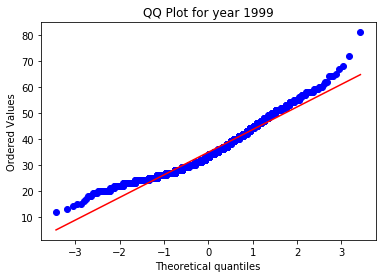

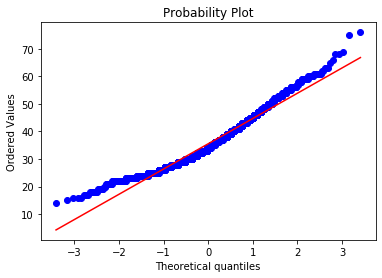

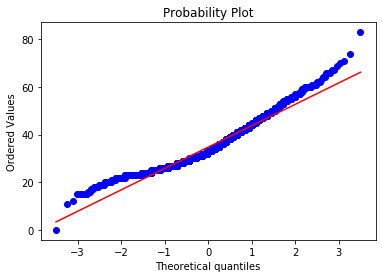

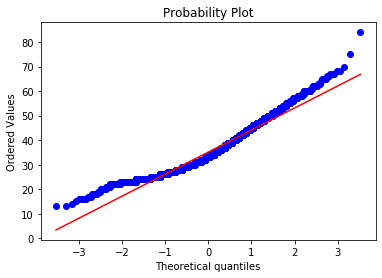

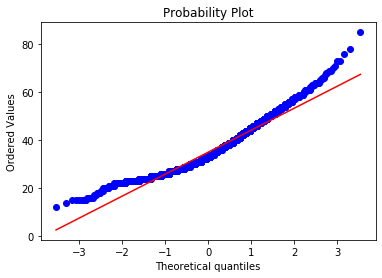

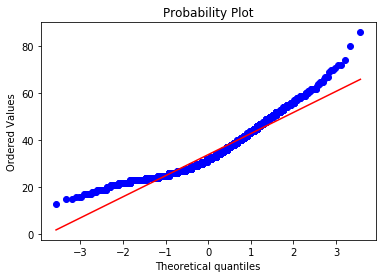

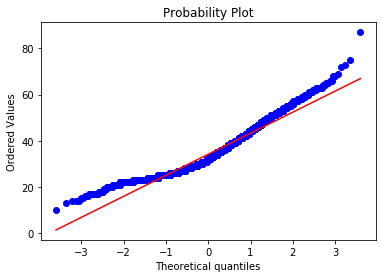

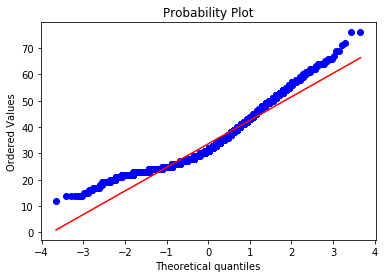

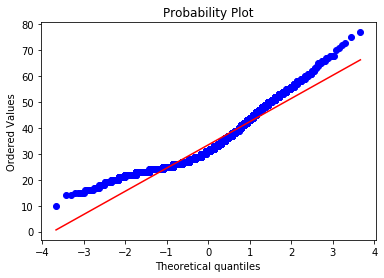

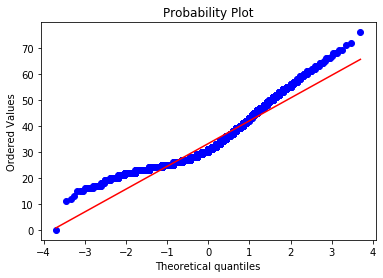

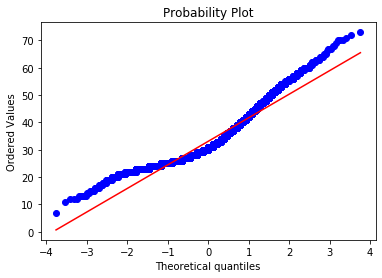

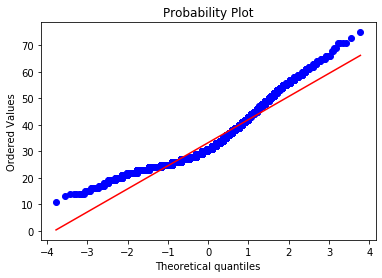

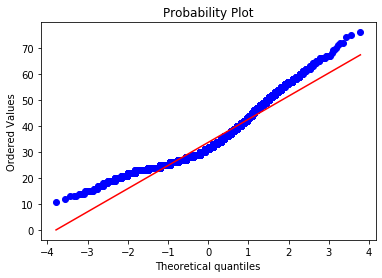

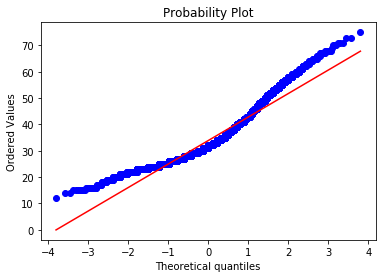

In [18]:
##QQ Plots##
fig = plt.figure()
ax = fig.add_subplot(111)
for label, data in plot_data.items():
    stats.probplot(data, dist="norm", plot=pylab)
    ax.set_title("QQ Plot for year {}".format(label))
    pylab.show()

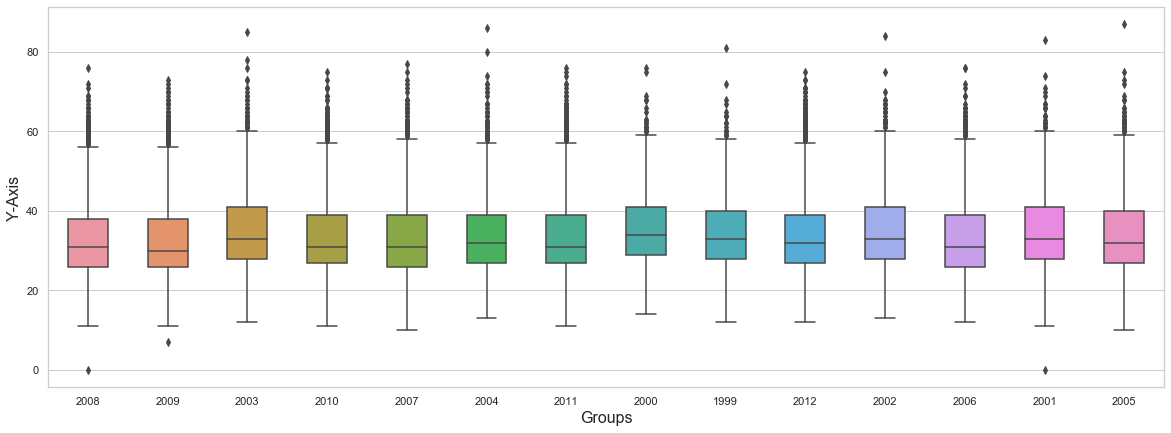

In [19]:
##Boxplots##
plt.figure(figsize=(20,7))
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(1)))
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.5)

plt.xticks(plt.xticks()[0], sorted_keys)

plt.show()

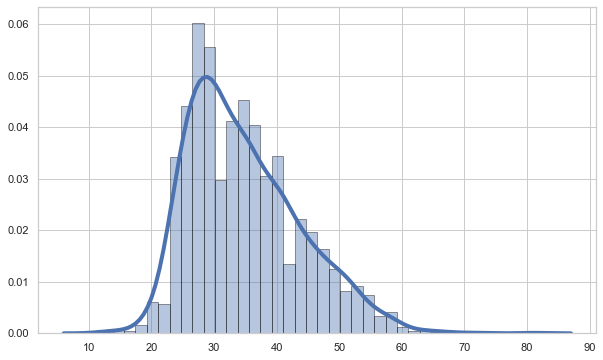

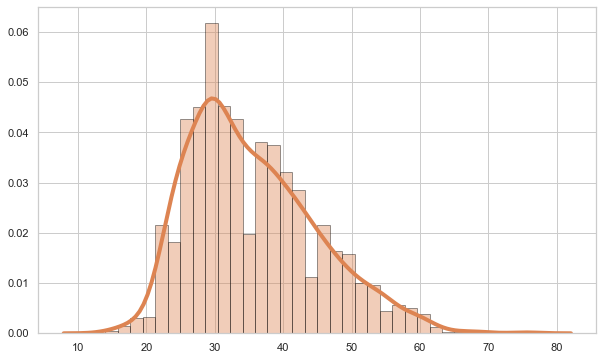

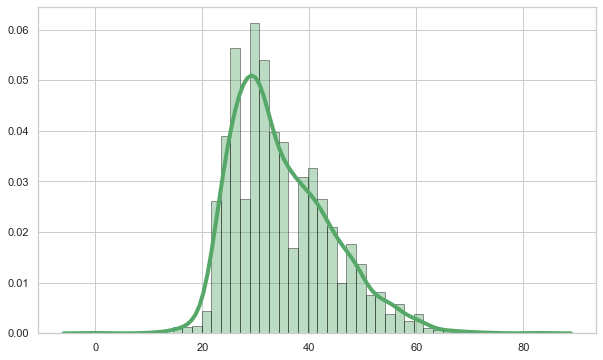

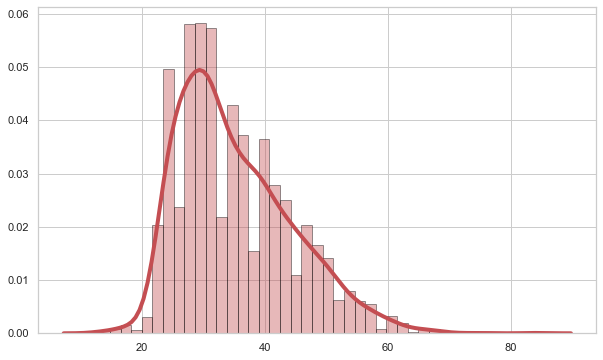

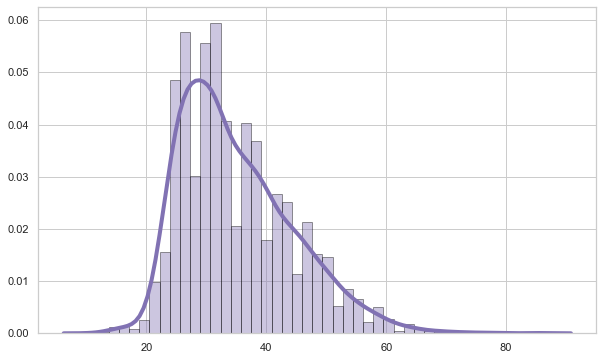

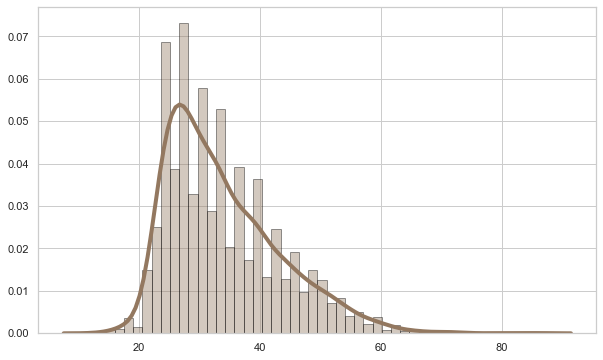

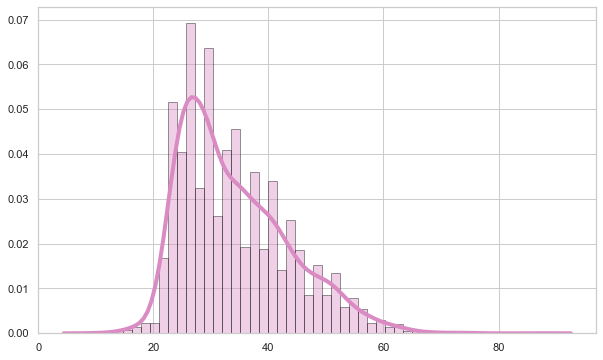

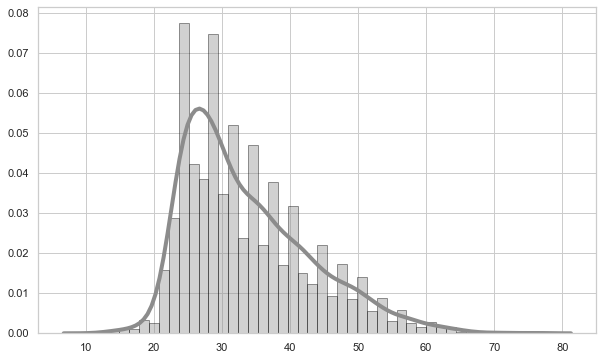

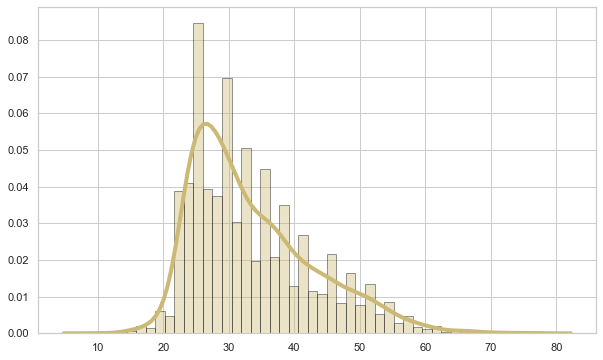

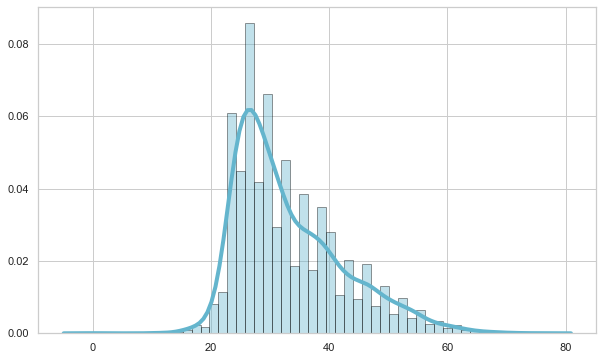

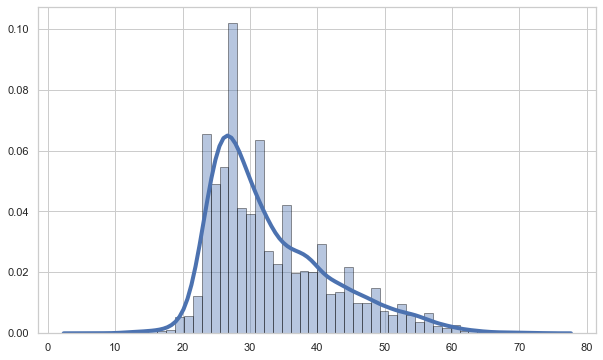

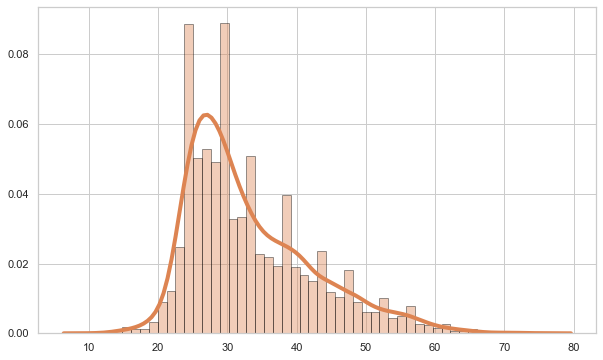

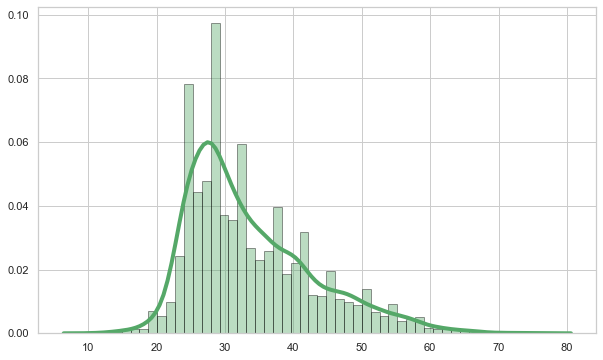

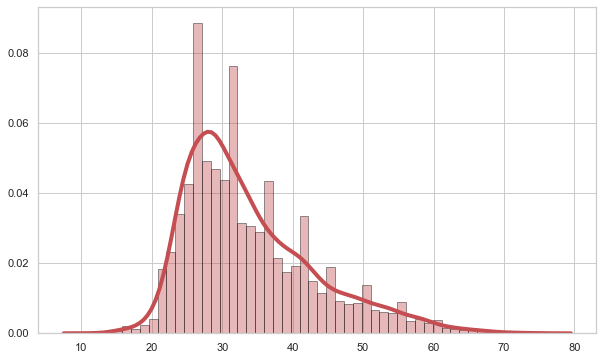

In [20]:
##Density Plots##
palette = itertools.cycle(sns.color_palette())
for d in plot_data.values():
    plt.figure(figsize=(10,6))
    c = next(palette)
    sns.distplot(d, hist=True, kde=True, color = c, 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})

# Conclusion

The change in age across the years is clearly very slight. Even printing all of the QQ plots next to each other demonstrates little to no change. The density plot shows similar overlay...the distribtution of the ages is bimodal around age 30. As in, the mode runner age across the years was around 25 or 35. The mean would be much higher - this is due to the large number of outliers (runners 60+ years old). This is most pronounced in the boxplots, where we can see a very slight change over the years. The average age and variance appears to slightly increase in the middle years (2003-2008), returning to the earlier values towards the end of the timeline. In particular, the years of 2003 and 2004 seem to have more pronounced increases, but this might be due to more outliers on the higher end of age...we can see the inverse effect in 2001 and 2008. It is important to note that with our data cleansing techniques, not all ages are being considered in this analysis.

### Closing Thoughts and Challenges

Converting to Python posed a lot of challenges. BeautifulSoup appears to parse preformatted text very differently from R's HTML and XML packages. It appears BS4 holds all the text as a string, possibly losing some delimiters that R was using to parse the columns into dataframes. This meant we had to rely on regex's to parse the data, which requires a lot of custom code and changes depending on the different formats across years. We noted the differences year over year, each of which required a different function to parse. These differences ranged from the placement of the rows and labels, the spacing of the cells, and even the encoding. This led to some issues reading the data into the dataframes, with some columns not populating correctly, and requiring the plotting to use some cleansing to plot the available data.

In the future, we would like to cleanse the data some more to make the dataframes more usable. Currently they are only strings and will require formatting to use more extensively. Additionally, we had to write a lot of custom code to scrape. Many of the functions have repetitive functions that we could have abstracted out into a class, such as the URL request, or a more dynamic dataframe builder to parse the columns and rows.